In [3]:

import seaborn as sns
import pandas as pd

In [8]:
%load_ext autoreload
%autoreload 2
from archive.trading_system.config import AppConfig
from archive.trading_system.main import main
from archive.trading_system.backtesting.evaluate_plot import plot_prices_positions_and_portfolio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
################################################################################
################################################################################
################################################################################

In [10]:
# Initialize the app configuration
config = AppConfig(system_mode='development')
# 
# Example usage
print(config.summary())

{'System Mode': 'development', 'Tickers': ['BTC-GBP', 'ETH-GBP', 'ETH-BTC'], 'Start Date': datetime.date(2024, 1, 1), 'End Date': datetime.date(2025, 12, 6), 'Database Path': 'outputs/mydatabase.db', 'File Path': '../outputs/'}


In [11]:
dic = main()

2025-12-06 18:05:33 - root - INFO - Main System: Starting the trading system...
2025-12-06 18:05:33 - root - INFO - Main System: Config loaded successfully.
C:\Users\hughd\PycharmProjects\daman-trading\trading_system\data\main.py:58: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(pair, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed
C:\Users\hughd\PycharmProjects\daman-trading\trading_system\data\main.py:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
2025-12-06 18:05:33 - root - INFO - Data fetched successfully for BTC-GBP.
C:\Users\hughd\PycharmProjects\daman-trading\trading_system\data\main.py:58: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(pair, start=start, end=end, interval="1d")
[*********

In [13]:
dic['evaluation_summary']

{'Number of Trading Days': 655,
 'Number of Trades': 84,
 'Average Trades Per Month': 4.0,
 'Start Portfolio Value': '£983',
 'End Portfolio Value': '£304',
 'Profit/Loss': '£-679',
 'Profit Percentage': '-69.0%',
 'Sharpe Ratio': np.float64(-1.52),
 'Sortino Ratio': np.float64(-1.41),
 'Volatility': '27.89%',
 'Max Drawdown': '-75.07%',
 'Average Drawdown Length': '81.12 days',
 'Fees Paid': '£0.00',
 'Win Rate': '50.0%',
 'Profit Factor': inf,
 'BTC-GBP Hold Final Value': '£1,591',
 'BTC-GBP Hold Profit/Loss': '£608',
 'BTC-GBP Hold Profit Percentage': '62.0%',
 'ETH-GBP Hold Final Value': '£934',
 'ETH-GBP Hold Profit/Loss': '£-49',
 'ETH-GBP Hold Profit Percentage': '-5.0%'}

In [14]:
dic.items()

dict_items([('BTC-GBP',                     Open          High           Low         Close  \
Date                                                                 
2024-02-20  41133.367188  41925.441406  40200.539062  41413.542969   
2024-02-21  41404.562500  41484.011719  40102.644531  41017.906250   
2024-02-22  41030.144531  41085.046875  40288.453125  40519.796875   
2024-02-23  40503.156250  40673.890625  39878.375000  40009.449219   
2024-02-24  40012.933594  40763.632812  39897.042969  40674.437500   
...                  ...           ...           ...           ...   
2025-12-01  68273.609375  68280.437500  63343.839844  65350.347656   
2025-12-02  65351.082031  69914.796875  65265.750000  69100.039062   
2025-12-03  69096.171875  70452.742188  68879.601562  70069.718750   
2025-12-04  70014.617188  70523.507812  68200.781250  69164.171875   
2025-12-05  69158.187500  69525.125000  66168.851562  67017.398438   

                 Volume      fast_ema      slow_ema  momentum_sig

C:\Users\hughd\PycharmProjects\daman-trading\trading_system\backtesting\evaluate_plot.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if positions_df['final_signal'][i] == 'BTC':
C:\Users\hughd\PycharmProjects\daman-trading\trading_system\backtesting\evaluate_plot.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif positions_df['final_signal'][i] == 'ETH':
C:\Users\hughd\PycharmProjects\daman-trading\trading_system\backtesting\evaluate_plot.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

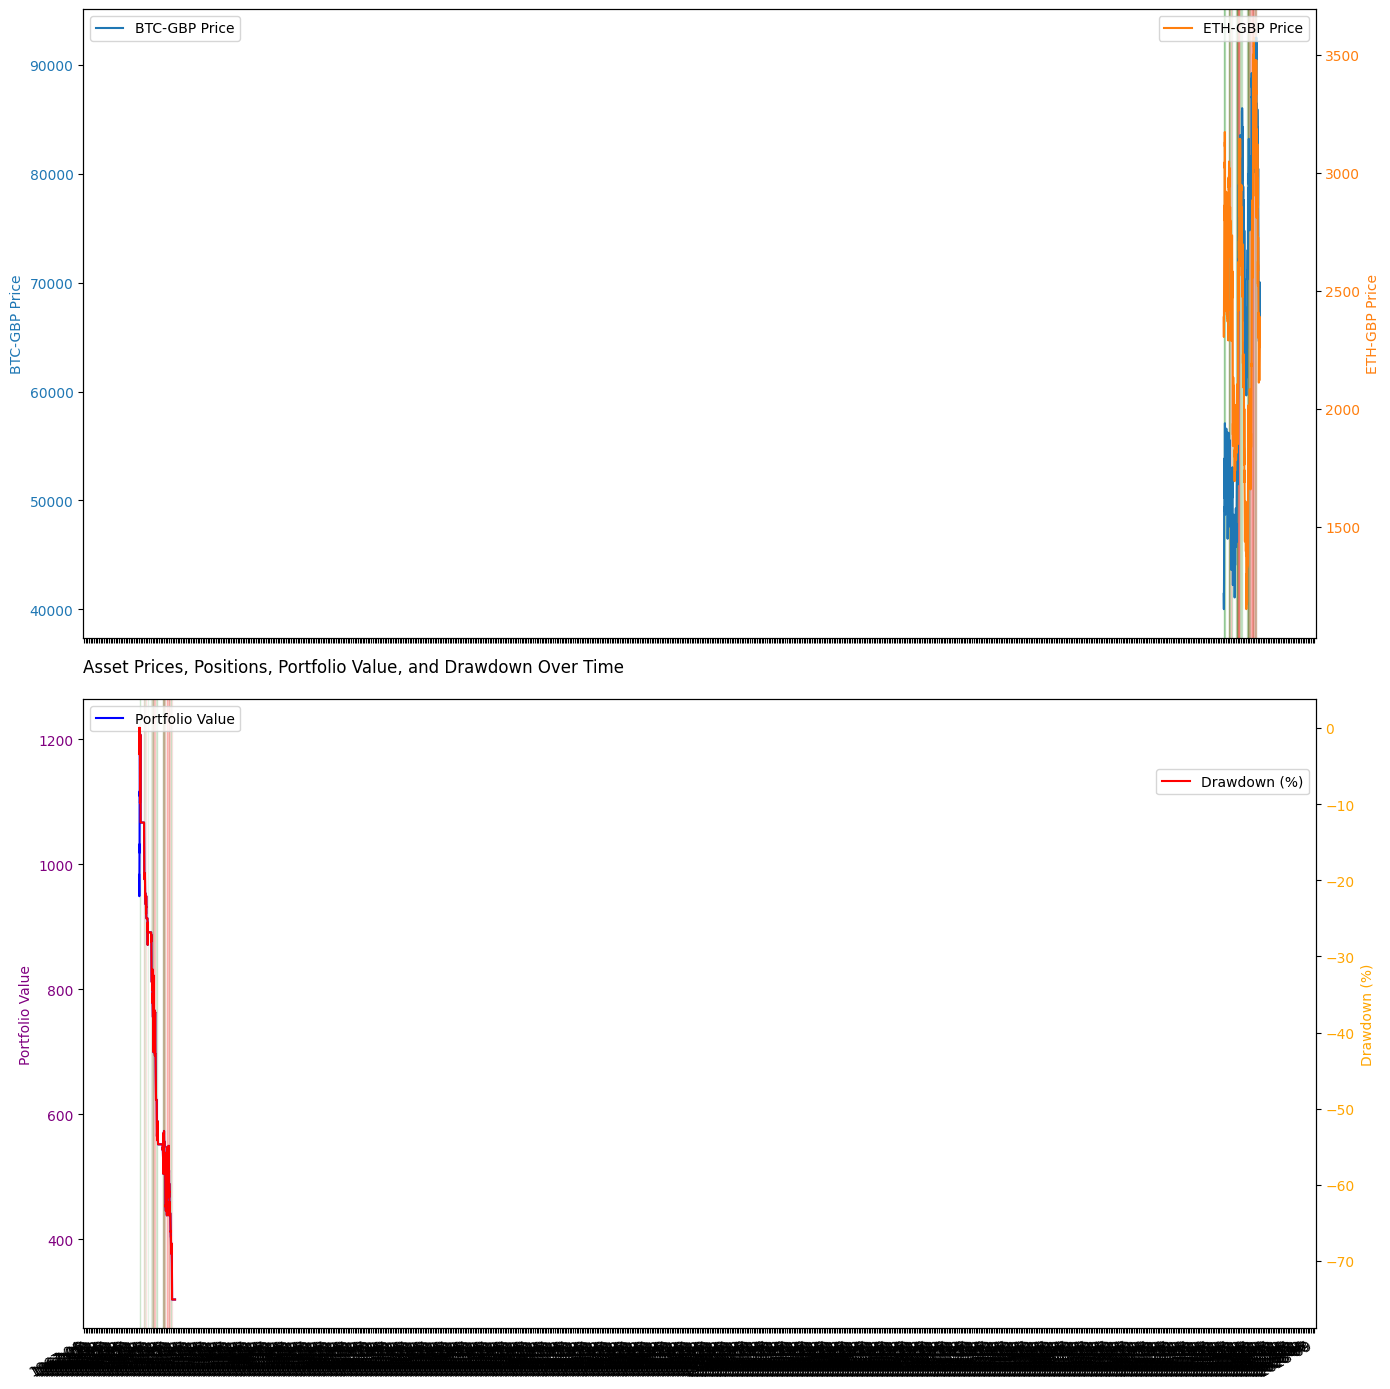

In [16]:
plot_prices_positions_and_portfolio(dic)

<Axes: >

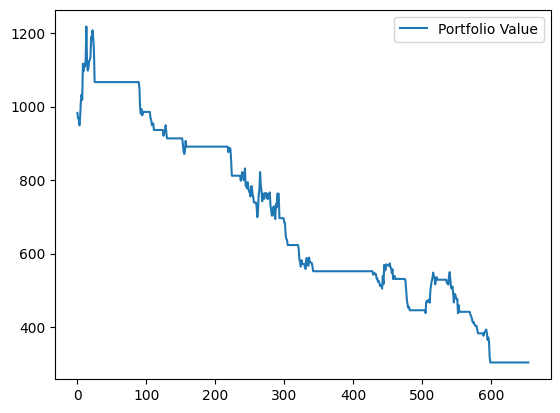

In [17]:
portfolio_values_df = pd.DataFrame(dic['backtest_details']['portfolio_value'], columns=['Portfolio Value'])
sns.lineplot(portfolio_values_df)

In [59]:
################################################################################
################################PLOTSPLOTSPLOTS#################################
################################################################################

In [18]:
def plot(df):
    sns.lineplot(data=df, x='Date', y='Close')
    sns.lineplot(data=df, x='Date', y='short_sma')
    sns.lineplot(data=df, x='Date', y='long_sma')

ValueError: Could not interpret value `short_sma` for `y`. An entry with this name does not appear in `data`.

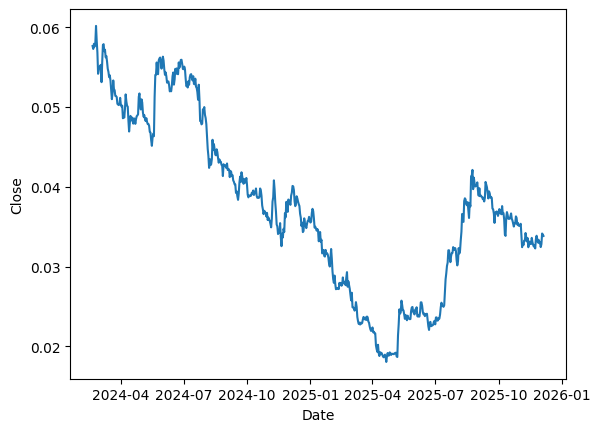

In [19]:
plot(pd.DataFrame(dic['ETH-BTC']))

ValueError: Could not interpret value `short_sma` for `y`. An entry with this name does not appear in `data`.

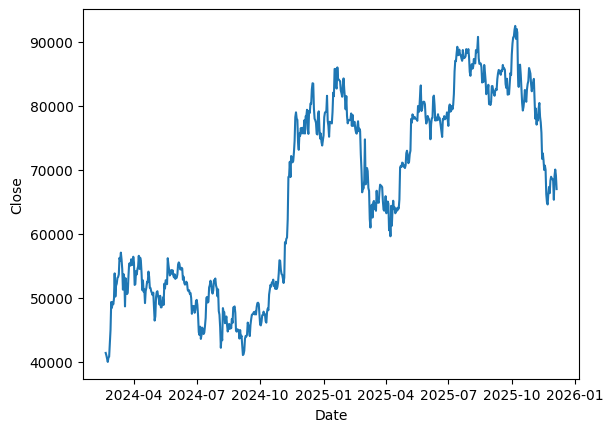

In [20]:
plot(pd.DataFrame(dic['BTC-GBP']))

ValueError: Could not interpret value `short_sma` for `y`. An entry with this name does not appear in `data`.

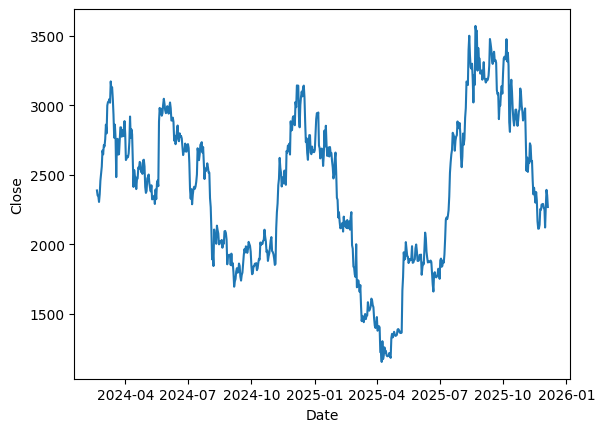

In [21]:
plot(pd.DataFrame(dic['ETH-GBP']))

In [22]:
dic.keys()

dict_keys(['BTC-GBP', 'ETH-GBP', 'ETH-BTC', 'combined_position', 'backtest_details', 'evaluation_summary'])

In [23]:
dic['backtest_details']['trades']

[{'asset': 'ETH',
  'action': 'buy',
  'qty': np.float64(0.41186307336701605),
  'price': np.float64(2398.855502929687),
  'transaction_cost': 12.0,
  'time_point': 0},
 {'asset': 'ETH',
  'action': 'sell',
  'qty': np.float64(0.41186307336701605),
  'price': np.float64(2545.8153564453123),
  'transaction_cost': np.float64(12.582328043166143),
  'time_point': 7},
 {'asset': 'BTC',
  'action': 'buy',
  'qty': np.float64(0.022622951497063712),
  'price': np.float64(45242.26951171875),
  'transaction_cost': np.float64(12.431340106648149),
  'time_point': 7},
 {'asset': 'BTC',
  'action': 'sell',
  'qty': np.float64(0.022622951497063712),
  'price': np.float64(49967.4696875),
  'transaction_cost': np.float64(13.564939718055765),
  'time_point': 14},
 {'asset': 'BTC',
  'action': 'buy',
  'qty': np.float64(0.021152723805823923),
  'price': np.float64(52165.60066406249),
  'transaction_cost': np.float64(13.402160441439095),
  'time_point': 15},
 {'asset': 'BTC',
  'action': 'sell',
  'qty': 

In [24]:
dic['combined_position']

,final_signal
Date,
2024-02-20,ETH
2024-02-21,Hold
2024-02-22,Hold
2024-02-23,Hold
2024-02-24,Hold
...,...
2025-12-01,Hold
2025-12-02,Hold
2025-12-03,Hold


In [25]:
dic.keys()

dict_keys(['BTC-GBP', 'ETH-GBP', 'ETH-BTC', 'combined_position', 'backtest_details', 'evaluation_summary'])